In [1]:
#!pip install tensorflow
#!pip install keras

import tensorflow
import keras as k

#Helps to create logical structure
#Helps to create sequential logical structure
from keras.models import Sequential

#It contain all layers for ANN CNN Arch
from keras.layers import InputLayer, Dense
#Dense can be act as either HL or OL

from keras.optimizers import SGD


import pandas
import numpy
import matplotlib.pyplot as plt


import sklearn



**Object:- Object having lots of method and attributes**

**--There are three stages to create a Deep Learning architechture--**
* **1. Create a Logical Structure give names as Vanilla ANN:- Whenever you are creating your own ANN with your own number of hidden layes and neurons is called as VANNILA ANN.**
* **2. Compile your Logical Structure:- Here you will decide what loss function you will use. and You will decide type of optimizer you will use. and You will decide what metric you will use to find training loss.**
* **3. Training:- It will do forward propogation, Bakward propogation.**

### VANILLA LOGICAL STRUCTURE CREATION

In [2]:
#VANILLA LOGICAL STRUCTURE CREATION

#Model Selection
model = Sequential()

#Input Layer Selection 5--features present in dataset
model.add(InputLayer(shape=(5,)))

#Hidden Layer Selection 
#units--no of neurons in hidden layer
#activation--activation function name(sigmoid/tanh/liner/identity)
#Inputs are 5 and HL Neuron are 4 so the connections are 5*4=20
#Use bias --- each and every neoron uses bias or not
model.add(Dense(units=4, activation='sigmoid', use_bias=True))

#Another second HL with 6 neurons
# first HL Neuron are 4 and  second HL Neuron are 6  so the connections are 6*4=24
model.add(Dense(units=6, activation='sigmoid', use_bias=True))

#Output Layer
#In Regression output layer should have only one neuron
#identity function can be written as 'linear'
model.add(Dense(units=1, activation='linear', use_bias=True))


#When we are creating logical structure,all the weights and bias will be Randomly Initiated automatically, and all the connection automatically made.

In [3]:
#Complete summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
model = Sequential()

model.add(InputLayer(shape=(5,)))

model.add(Dense(units=7,activation='sigmoid',use_bias=True))

model.add(Dense(units=8, activation='sigmoid',use_bias=True))

model.add(Dense(units=1,activation= 'linear',use_bias=True))

In [5]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 7)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model = Sequential()

model.add(InputLayer(shape=(6,)))

model.add(Dense(units=9,activation='sigmoid',use_bias=True))

model.add(Dense(units=1, activation='linear',use_bias=True))

In [7]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 9)                   │              63 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

### Compiling your Logical Structure

In [8]:
#Drawback of SGD is there is constant learning rate, we cannot change
#T change we are importing optimizer SGD and creating object of a class
sgd = SGD(learning_rate=0.001)

In [9]:
#If we dont want to change anything in SGD we can go by this approach, but above is good practice.

model.compile(optimizer=sgd, loss= 'mean_squared_error' )

#### For small dataset use GD
#### For Large dataset use MSGD

### Training

In [10]:
#If Batcsize= 1 , It will select only data points and perform forward and backward propogation and we will get one Output at one time. Apok will be 1
#If batchsize=10, It will randomly select 10 data points and perform FOR BACKW propogation and you will get 10 output,Apok will be 10
#If batchsize=100, Apok will be 1

model.fit(x_train,y_train, batch_size=)


SyntaxError: invalid syntax (2599410659.py, line 5)

### Working on a DATASET

In [11]:
import pandas
import numpy
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



import tensorflow
import keras as k

#Helps to create logical structure
#Helps to create sequential logical structure
from keras.models import Sequential

#It contain all layers for ANN CNN Arch
from keras.layers import InputLayer, Dense
#Dense can be act as either HL or OL

from keras.optimizers import SGD

**1. Creating Dataset**

In [12]:
#fv-feature variable, cv-class variable
fv, cv = make_regression(n_samples=2000, n_features=5, random_state=10)

In [13]:
 fv.shape

(2000, 5)

In [14]:
cv.shape

(2000,)

**Whenever you have negative values in yi dont use means_quared_logirathmic_error, use mean_sq_err or mean_abs_err, becz Logirithm may cause infinite value for negative and zeros.**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(fv, cv, test_size=0.2, random_state=10)

In [16]:
X_train.shape

(1600, 5)

**ANN / CNN / RNN is distance based DL, our duty to make out data standardized for same scale becz pf wights**)

In [17]:
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

**2. Logical Structure**

In [18]:
X_train.shape

(1600, 5)

In [19]:
model = Sequential()


model.add(InputLayer(shape = (5,)))

model.add(Dense(units=4, activation='sigmoid', use_bias=True))

model.add(Dense(units=6, activation='sigmoid', use_bias=True))

model.add(Dense(units=1, activation='linear', use_bias=True))

In [20]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 4)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

**3. Compiling and Training**

In [21]:
#Whenever you have negative values in yi dont use means_quared_logirathmic_error, use mean_sq_err or mean_abs_err, becz Logirithm may cause infinite value for negative and zeros.In this we have negatives yi thats wh we are uing means_squared_error.

sgd = SGD(learning_rate=0.001)

model.compile(optimizer=sgd, loss = 'mean_squared_error')

model.fit(X_train, y_train, batch_size=1600, epochs=2)

#Each iteration taking 204 milisecond

Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step - loss: 20492.5430
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 20491.6777


In [22]:
#Whenever you have negative values in yi dont use means_quared_logirathmic_error, use mean_sq_err or mean_abs_err, becz Logirithm may cause infinite value for negative and zeros.In this we have negatives yi thats wh we are uing means_squared_error.

sgd = SGD(learning_rate=0.001)

model.compile(optimizer=sgd, loss = 'mean_squared_error')

model.fit(X_train, y_train, batch_size=10, epochs=20)

#Loss is decreasing , it means model is improving 

Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21121.7734
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15434.4590
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10937.8477
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7625.3340
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5550.5552
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4161.2319
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3717.1240
Epoch 8/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2824.6101
Epoch 9/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2916.5166
Epoch 10/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2480.9026
Epoch 11/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2291.2527
Epoch 12/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1940.9729
Epoch 13/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1650.4065
Epoch 14/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1348.3730
Epoch 15/20


In [23]:
#Whenever you have negative values in yi dont use means_quared_logirathmic_error, use mean_sq_err or mean_abs_err, becz Logirithm may cause infinite value for negative and zeros.In this we have negatives yi thats wh we are uing means_squared_error.

sgd = SGD(learning_rate=0.001)

model.compile(optimizer=sgd, loss = 'mean_squared_error')
#loss = 'mean_squared_error' is used for backward propogation

model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2)
#Validation_split = Out of 1600 datapoints, 20% data will send to validation to find validation loss

#Loss is decreasing , it means model is improving 

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 806.0923 - val_loss: 827.2311
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 878.5110 - val_loss: 792.7600
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 914.3693 - val_loss: 759.8646
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 947.3466 - val_loss: 704.3082
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 695.8139 - val_loss: 864.4059
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 949.2441 - val_loss: 783.9932
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 760.0529 - val_loss: 628.6960
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 819.5779 - val_loss: 717.6253
Epoch 9/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 566.7222 - val_loss: 573.9446
Epoch 10/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 638.1485 - val_loss: 696.0088


In [28]:
sgd = SGD(learning_rate=0.001)

model.compile(optimizer=sgd, loss = 'mean_squared_error', metrics=['r2_score'])

model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2)

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 744.5016 - r2_score: 0.9638 - val_loss: 1191.7994 - val_r2_score: 0.9415
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 849.5652 - r2_score: 0.9584 - val_loss: 544.4301 - val_r2_score: 0.9733
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 326.7689 - r2_score: 0.9837 - val_loss: 466.7929 - val_r2_score: 0.9771
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 399.7782 - r2_score: 0.9818 - val_loss: 466.0025 - val_r2_score: 0.9771
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 640.0600 - r2_score: 0.9710 - val_loss: 367.1639 - val_r2_score: 0.9820
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 300.0022 - r2_score: 0.9851 - val_loss: 301.5831 - val_r2_score: 0.9852
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 409.6276 - r2_score: 0.9799 - val_loss: 275.7620 - val_r2_score: 0.9865
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 287.5558 - r2_s

In [29]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2)
#history is the variable and its stroing in dictionary.
#Inside history one more history is created by Keras

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 322.5540 - r2_score: 0.9837 - val_loss: 489.4314 - val_r2_score: 0.9760
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 578.1198 - r2_score: 0.9675 - val_loss: 295.4617 - val_r2_score: 0.9855
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 269.6966 - r2_score: 0.9869 - val_loss: 291.4195 - val_r2_score: 0.9857
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 327.1674 - r2_score: 0.9851 - val_loss: 233.2857 - val_r2_score: 0.9886
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 294.2945 - r2_score: 0.9855 - val_loss: 249.6929 - val_r2_score: 0.9877
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 193.2103 - r2_score: 0.9902 - val_loss: 212.1699 - val_r2_score: 0.9896
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 236.9917 - r2_score: 0.9882 - val_loss: 234.0387 - val_r2_score: 0.9885
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 218.7491 - r2_sc

In [30]:
history.history

{'loss': [336.0828857421875,
  388.79608154296875,
  278.67926025390625,
  249.0188751220703,
  281.2392883300781,
  248.85104370117188,
  255.56076049804688,
  240.99301147460938,
  262.3996276855469,
  316.865478515625],
 'r2_score': [0.9835821986198425,
  0.9810071587562561,
  0.9863864183425903,
  0.9878353476524353,
  0.9862613677978516,
  0.9878435134887695,
  0.9875157475471497,
  0.9882274270057678,
  0.9871816635131836,
  0.9845209717750549],
 'val_loss': [489.431396484375,
  295.461669921875,
  291.41949462890625,
  233.28573608398438,
  249.69290161132812,
  212.169921875,
  234.0386505126953,
  1023.1368408203125,
  402.0626525878906,
  192.28866577148438],
 'val_r2_score': [0.9759832620620728,
  0.9855014681816101,
  0.9856998324394226,
  0.9885525107383728,
  0.9877473711967468,
  0.9895886778831482,
  0.9885155558586121,
  0.9497939944267273,
  0.980270504951477,
  0.9905642867088318]}

In [31]:
history.history['loss']

[336.0828857421875,
 388.79608154296875,
 278.67926025390625,
 249.0188751220703,
 281.2392883300781,
 248.85104370117188,
 255.56076049804688,
 240.99301147460938,
 262.3996276855469,
 316.865478515625]

In [32]:
history.history['val_loss']

[489.431396484375,
 295.461669921875,
 291.41949462890625,
 233.28573608398438,
 249.69290161132812,
 212.169921875,
 234.0386505126953,
 1023.1368408203125,
 402.0626525878906,
 192.28866577148438]

**Cross Validation Graph between training and validation loss**

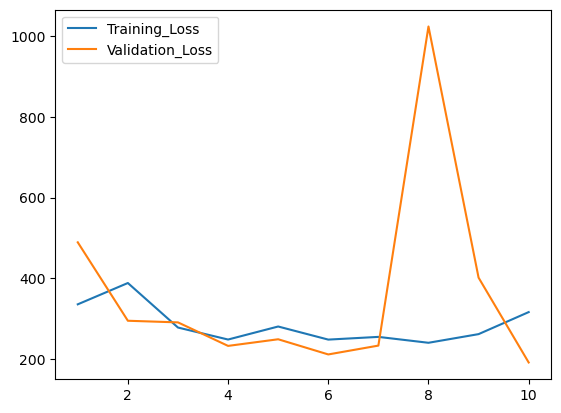

In [40]:
plt.plot(range(1,11), history.history['loss'],label="Training_Loss")
plt.plot(range(1,11), history.history['val_loss'],label="Validation_Loss")
plt.legend()
plt.show()
#range = no of epoch

In [41]:
model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[  74.0753   ],
       [ 163.10872  ],
       [ 236.32735  ],
       [ 153.92613  ],
       [ -66.94957  ],
       [ 190.09503  ],
       [  74.747116 ],
       [  86.02426  ],
       [ -62.799892 ],
       [ 181.85823  ],
       [-109.74432  ],
       [  83.724945 ],
       [ -33.37927  ],
       [-227.63177  ],
       [ -93.712555 ],
       [ 183.4413   ],
       [ 182.58447  ],
       [ -38.846798 ],
       [  50.018375 ],
       [ -15.467937 ],
       [  79.93843  ],
       [ -48.146313 ],
       [  31.397861 ],
       [  -8.601864 ],
       [ 147.42422  ],
       [  26.000294 ],
       [ 150.6043   ],
       [ 154.22269  ],
       [ -88.72897  ],
       [ -47.73411  ],
       [  -3.3053093],
       [-248.04892  ],
       [ 217.32085  ],
       [ -22.321285 ],
       [ 106.568436 ],
       [  20.4278   ],
       [-213.32234  ],
       [  75.99307  ],
       [ 137.63121  ],
       [-189.88434  ],
       [  48.471348 ],
       [   3.9439583],
       [-210.68799  ],
       [  2

In [42]:
predict = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [43]:
from sklearn import metrics

In [45]:
metrics.r2_score(y_test, predict)

0.9891939152641879